In [1]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_test.csv' , header=0)
val = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_val.csv' , header=0)

# add column to identify train, test and val
train['set'] = 'train'
test['set'] = 'test'
val['set'] = 'val'

# Merge train, test and val
df = pd.concat([train, test, val], axis=0)

df

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,head,relation,tail,set
0,-0.034373,0.052990,0.069146,-0.007425,0.047442,-0.083339,-0.074493,0.040815,-0.041191,0.047949,...,-0.294970,0.310747,0.301654,0.309505,-0.287372,0.315604,https://wormbase.org/wbinter/000544216,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_010043,train
1,-0.018719,0.036862,0.034742,0.021447,0.024787,-0.033178,-0.044842,0.035912,-0.043536,0.045556,...,-0.428440,0.323528,-0.489384,0.485992,-0.520290,-0.488257,https://wormbase.org/wbdata/pheno-337115,http://semanticscience.org/resource/SIO_000281,https://wormbase.org/species/all/phenotype/WBP...,train
2,-0.050112,0.004580,0.021557,-0.000500,0.013067,-0.046085,-0.050308,0.015250,-0.051285,0.051107,...,0.010906,0.023637,-0.001101,0.014640,-0.040882,0.009947,https://wormbase.org/wbdata/pheno-424591,no_link_known,sru-42,train
3,-0.016045,0.037759,0.032458,0.021037,-0.023242,-0.033032,-0.032948,0.005361,-0.026028,0.023513,...,0.033237,-0.040597,-0.028403,-0.041888,0.047544,0.004921,https://wormbase.org/wbdata/pheno-45278,no_link_known,https://wormbase.org/wbdata/pheno-203949,train
4,-0.023017,0.016592,0.049542,0.028821,-0.028735,-0.035397,-0.042786,0.034576,-0.035928,0.040613,...,-0.484678,0.477283,-0.489351,0.518109,-0.502757,-0.464765,https://wormbase.org/wbdata/pheno-166767,http://semanticscience.org/resource/SIO_000281,https://wormbase.org/species/all/phenotype/WBP...,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234191,-0.081616,-0.010663,0.024751,-0.086546,-0.072133,-0.087349,0.069999,-0.103728,-0.027185,-0.010822,...,-0.049418,-0.057396,0.065547,-0.060583,0.039364,0.052143,https://wormbase.org/species/c_elegans/gene/WB...,no_link_known,https://wormbase.org/wbdata/pheno-343098,val
234192,0.054770,-0.052268,0.064768,-0.063158,-0.069956,-0.066765,-0.056419,0.058635,0.062441,0.066964,...,-0.007706,-0.041902,0.008547,0.031074,0.049211,-0.037520,https://wormbase.org/wbdata/pheno-95315,http://www.semanticweb.org/needed-terms#001,https://wormbase.org/species/c_elegans/gene/WB...,val
234193,0.018398,-0.005973,0.001113,0.029475,-0.027103,0.015876,0.030861,-0.051139,0.032242,-0.019803,...,-0.024987,0.018698,0.030898,-0.022456,-0.004443,0.006699,https://wormbase.org/species/c_elegans/gene/WB...,no_link_known,https://wormbase.org/wbdata/pheno-167420,val
234194,-0.032269,0.042926,0.051747,-0.007377,0.041330,0.025196,-0.039400,-0.048995,0.014433,0.053791,...,-0.032296,0.026252,0.020020,-0.004574,0.020071,-0.000107,https://wormbase.org/wbdata/pheno-151243,http://www.semanticweb.org/needed-terms#001,https://wormbase.org/species/c_elegans/gene/WB...,val


In [3]:
# split combined embeddings into individual nodes
df1 = df.iloc[:, :100] # Head node
df2 = df.iloc[:, 100:200] # Tail node

# Add column to identify head and tail node
df1['node'] = df['head']
df2['node'] = df['tail']
df1['set'] = df['set']
df2['set'] = df['set']

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Count the number of times a node appears in the dataset and add the count as a column
df['connectivity'] = df.groupby('node')['node'].transform('count')

# Drop duplicates
df = df.drop_duplicates(subset=['node'])

df

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,node,set,connectivity
0,-0.034373,0.052990,0.069146,-0.007425,0.047442,-0.083339,-0.074493,0.040815,-0.041191,0.047949,...,0.060184,0.039854,-0.060941,-0.004433,-0.061820,0.065740,0.033293,https://wormbase.org/wbinter/000544216,train,9
1,-0.018719,0.036862,0.034742,0.021447,0.024787,-0.033178,-0.044842,0.035912,-0.043536,0.045556,...,0.043549,0.021640,-0.044829,-0.040988,-0.044305,0.025428,-0.044634,https://wormbase.org/wbdata/pheno-337115,train,7
2,-0.050112,0.004580,0.021557,-0.000500,0.013067,-0.046085,-0.050308,0.015250,-0.051285,0.051107,...,0.050719,0.051666,-0.001481,0.029567,-0.054339,-0.049905,0.044102,https://wormbase.org/wbdata/pheno-424591,train,4
3,-0.016045,0.037759,0.032458,0.021037,-0.023242,-0.033032,-0.032948,0.005361,-0.026028,0.023513,...,0.024484,-0.032602,0.022479,-0.009310,-0.033728,0.025544,-0.034285,https://wormbase.org/wbdata/pheno-45278,train,6
4,-0.023017,0.016592,0.049542,0.028821,-0.028735,-0.035397,-0.042786,0.034576,-0.035928,0.040613,...,0.047381,-0.009331,0.017041,-0.034415,-0.039327,0.041585,0.009805,https://wormbase.org/wbdata/pheno-166767,train,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361657,0.030479,-0.040725,0.055344,0.034696,-0.007674,0.021358,0.026818,0.027636,0.032258,-0.029633,...,-0.028189,0.026034,-0.050920,0.042928,0.023769,-0.025680,0.012660,acox-1.2,train,1
2363018,-0.042862,0.032580,0.042489,-0.016743,0.037297,0.033861,0.037883,0.028181,-0.025128,-0.037130,...,-0.037918,0.038291,-0.035925,0.030521,-0.022751,-0.035226,-0.040608,lin-15A,train,1
2363556,0.000422,-0.028340,0.019669,-0.032994,0.012344,-0.011820,-0.006684,-0.029803,0.026568,0.024906,...,0.010430,-0.011418,0.021321,0.007423,-0.010707,0.018513,0.031044,21ur-11358,train,1
2363825,-0.037745,-0.034567,0.021365,-0.017425,0.020261,-0.005854,-0.018224,-0.032659,0.023403,0.032857,...,0.018193,-0.028446,0.020402,0.010733,-0.006335,0.031620,0.030213,21ur-7828,train,1


In [9]:
# Select only embeddings
df_umap = df.iloc[:, :100]

# Apply UMAP
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Import umap
import umap
import matplotlib.pyplot as plt

# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_umap)

# Run UMAP on the reduced data
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

embedding

array([[-3.0116642 , -6.7133565 ],
       [-0.50776094, -1.3205854 ],
       [-4.4314656 , -1.7382046 ],
       ...,
       [-9.950463  ,  4.3578243 ],
       [-9.998005  ,  4.7755876 ],
       [ 8.349936  , -8.823705  ]], dtype=float32)

In [13]:
# transform embedding into dataframe
df_umap = pd.DataFrame(embedding)
df_umap = df_umap.reset_index(drop=True)
df = df.reset_index(drop=True)
# Rename col 0 as UMAP1 and col 1 as UMAP2
df_umap.columns = ['UMAP1', 'UMAP2']
df_umap['node'] = df['node']
df_umap['set'] = df['set']
df_umap['connectivity'] = df['connectivity']
df_umap

,UMAP1,UMAP2,node,set,connectivity
0,-3.011664,-6.713356,https://wormbase.org/wbinter/000544216,train,9
1,-0.507761,-1.320585,https://wormbase.org/wbdata/pheno-337115,train,7
2,-4.431466,-1.738205,https://wormbase.org/wbdata/pheno-424591,train,4
3,6.536343,-3.039644,https://wormbase.org/wbdata/pheno-45278,train,6
4,3.943825,-1.983027,https://wormbase.org/wbdata/pheno-166767,train,6
...,...,...,...,...,...
675840,8.406230,-9.213593,acox-1.2,train,1
675841,8.256486,-9.023268,lin-15A,train,1
675842,-9.950463,4.357824,21ur-11358,train,1
675843,-9.998005,4.775588,21ur-7828,train,1


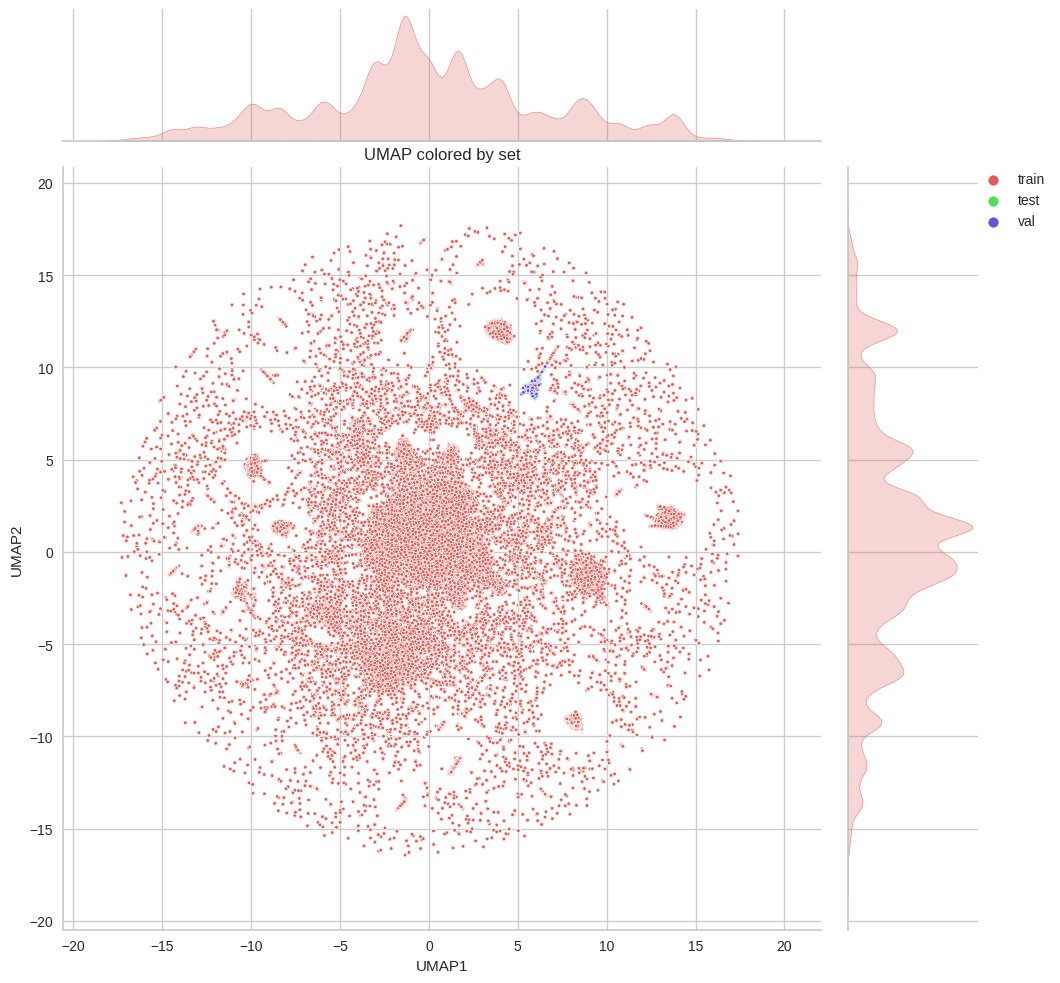

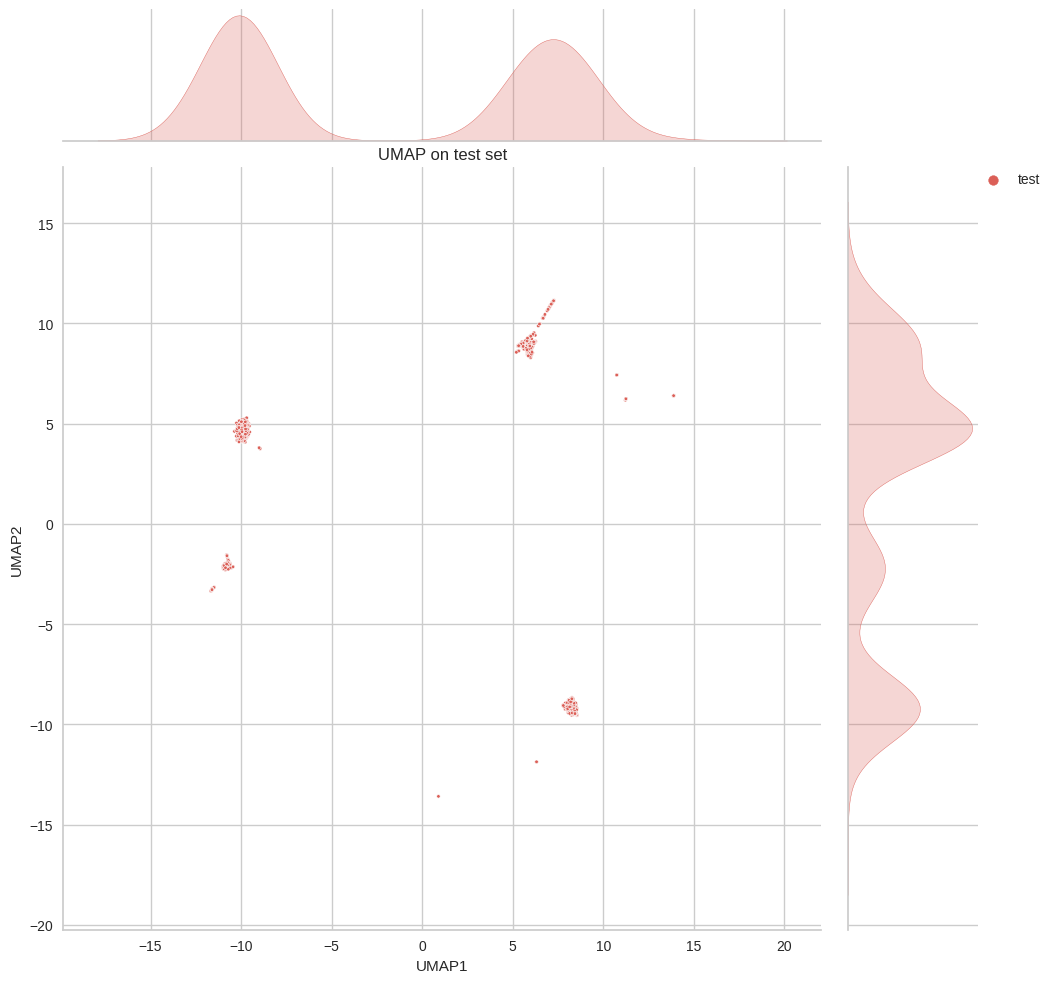

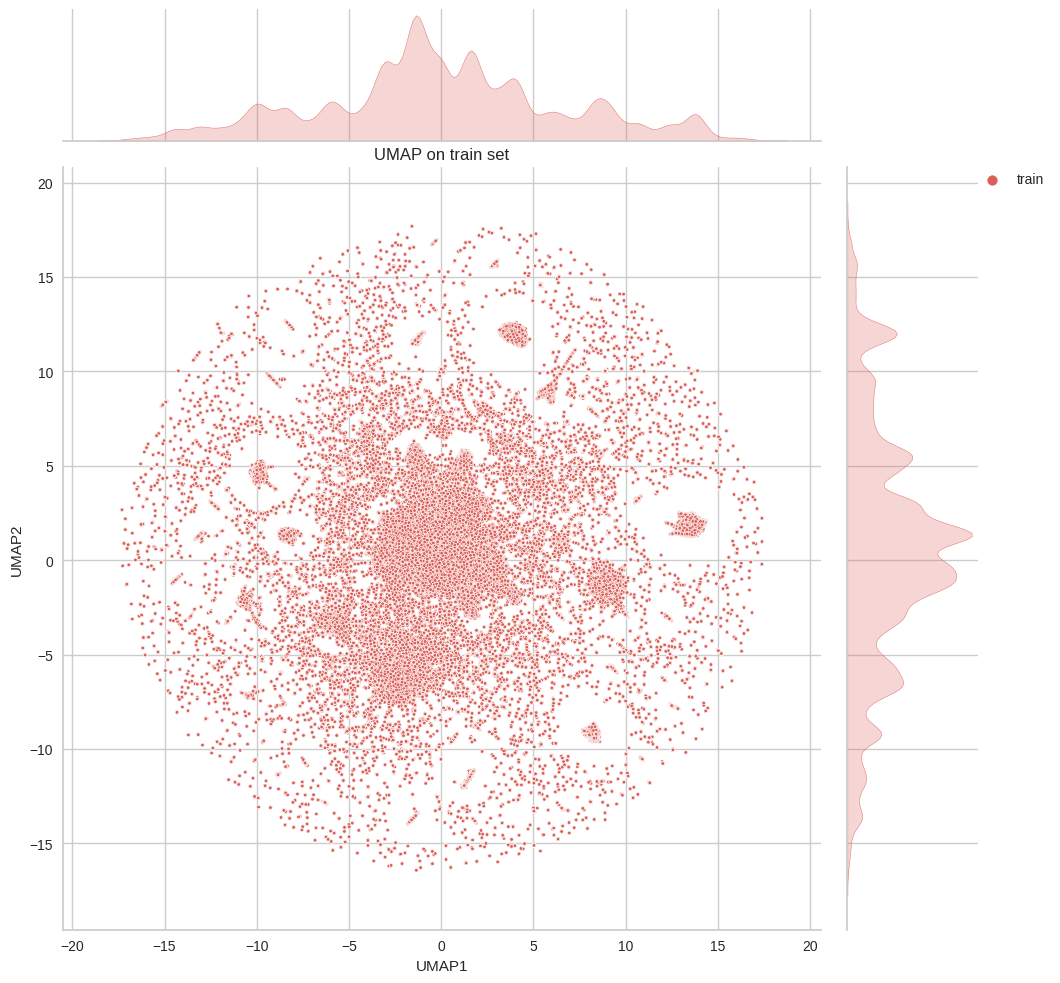

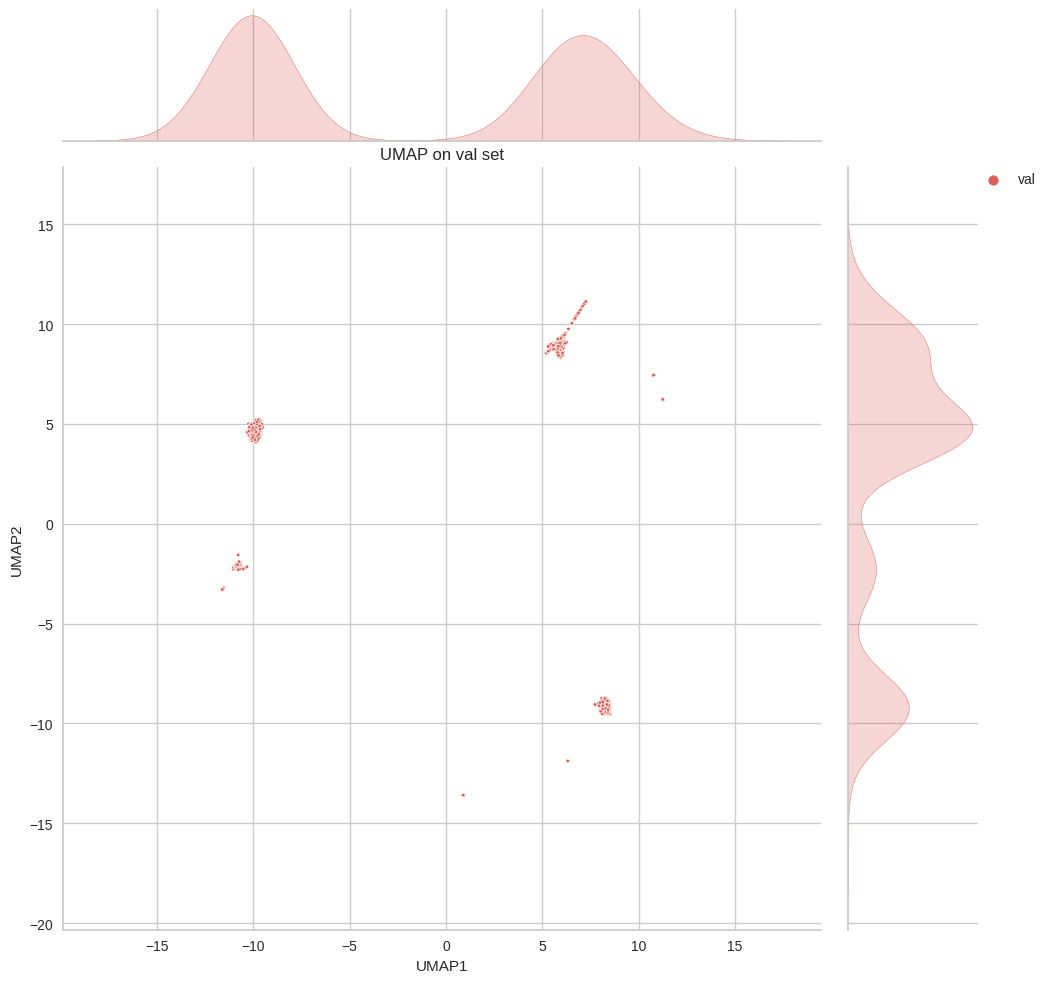

In [16]:
# Group the DataFrame based on the 'Set' column
grouped = df_umap.groupby('set')

g = sns.jointplot(data=df_umap, x='UMAP1', y='UMAP2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('UMAP1', 'UMAP2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('UMAP colored by set')
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='UMAP1', y='UMAP2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('UMAP1', 'UMAP2')

    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.title('UMAP on ' + group_name + ' set')
    plt.show()

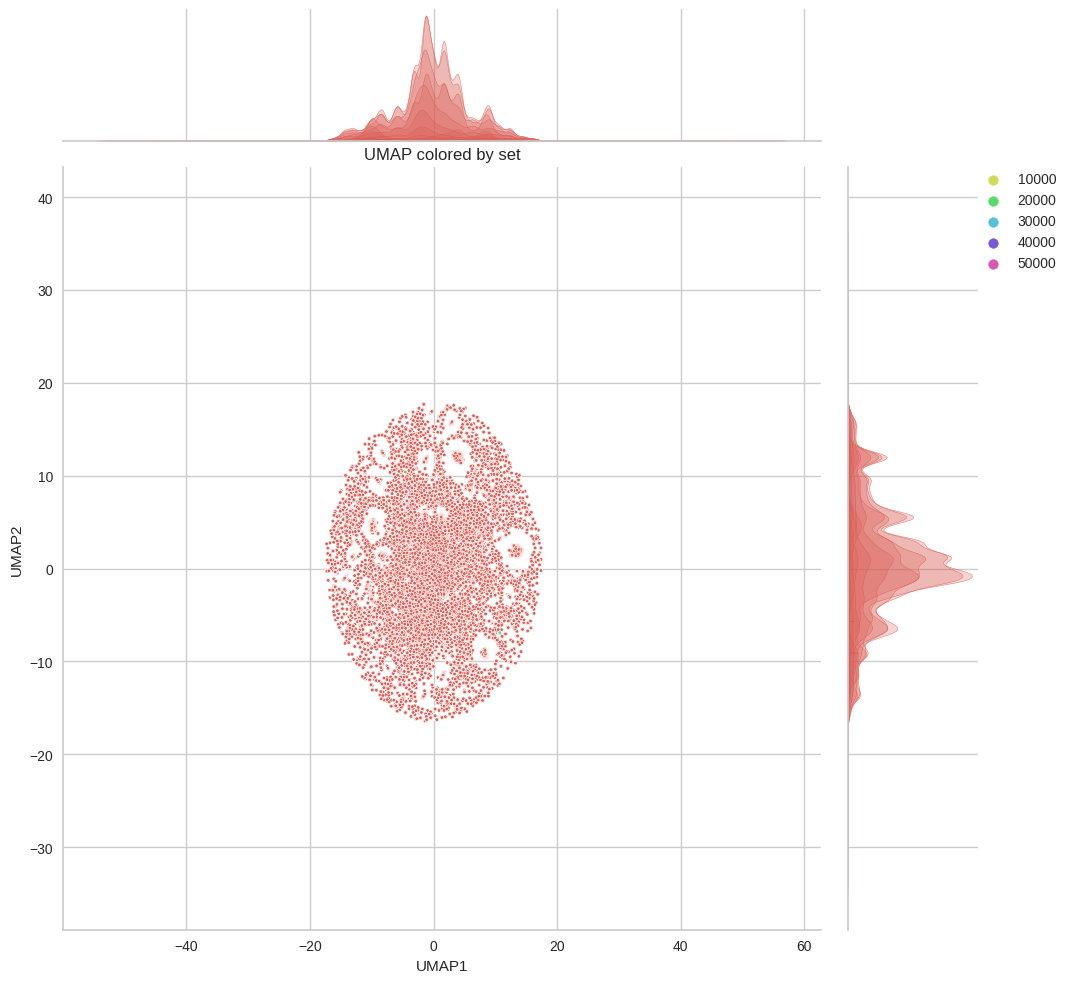

In [17]:
g = sns.jointplot(data=df_umap, x='UMAP1', y='UMAP2', hue='connectivity', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('UMAP1', 'UMAP2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('UMAP colored by connectivity')
plt.show()


ValueError: Could not interpret value `` for parameter `hue`

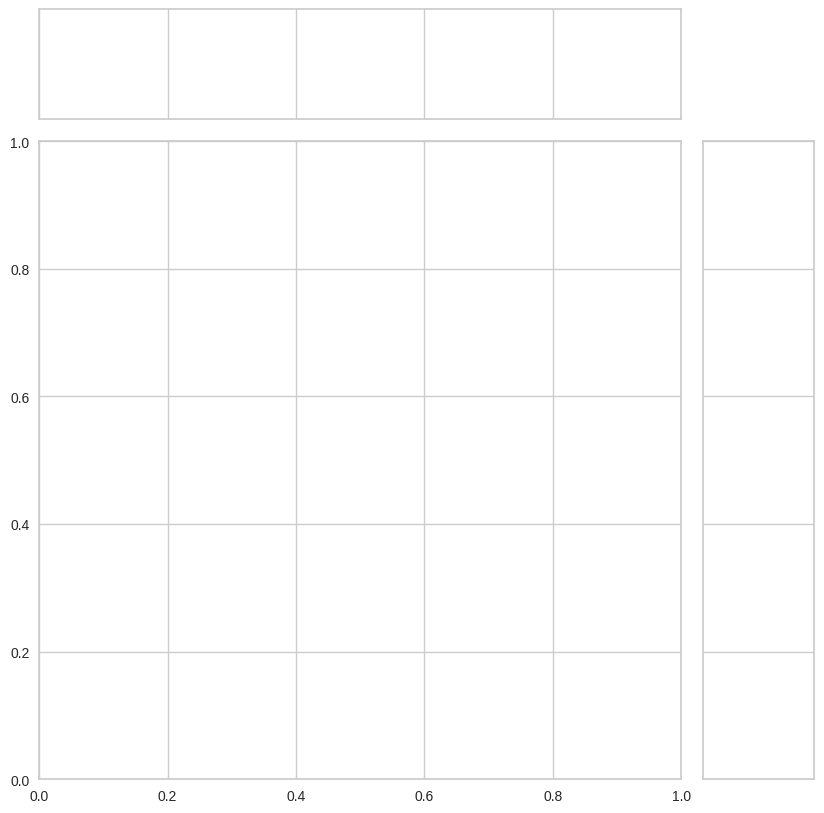

In [18]:
df_umap['node_type'] = df_umap['node'].str.split('/').str[:-1]
g = sns.jointplot(data=df_umap, x='UMAP1', y='UMAP2', hue='node_type', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('UMAP1', 'UMAP2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('UMAP colored by node type')
plt.show()